# Analisi dei dati raccolti

## Setup

In [3]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
%matplotlib inline

from types import FunctionType

In [4]:
def plotter(dataframes: list, index: str, names: list, space: int) -> None:
    xvalues_int = list()
    xvalues_str = list()
    for name in names:
        xvalues_str.extend(["", name, ""])

    plt.gcf().set_size_inches(10, 6)
    plt.title("Generazione" if "A" in index else "Verifica")
    plt.ylabel("Tempo di esecuzione")
    
    start = 1
    ymax = 0
    for dataframe in dataframes:
        series = dataframe[index]
        ymax = max(ymax, max(series))
        x = [start, start+1, start+2]
        xvalues_int.extend(x)
        plt.bar(x, [series.min(), series.mean(), series.max()])
        start += 5
    
    plt.xticks(xvalues_int, xvalues_str, rotation=90)
    plt.yticks([i for i in range(0, ymax+space, space)])
    plt.grid(axis="y")
    
    plt.show()

In [5]:
PATH = "../asconprfv12/data/{}.csv"

IMPLEMENTATIONS = [
    "armv7m", "armv7m_small", "bi32", "bi32_armv7m", "bi32_lowreg", "opt32", "ref"
]

armv7m = pd.read_csv(open(PATH.format("armv7m"), "r"), delimiter=";")
armv7m_small = pd.read_csv(open(PATH.format("armv7m_small"), "r"), delimiter=";")
bi32 = pd.read_csv(open(PATH.format("bi32"), "r"), delimiter=";")
bi32_armv7m = pd.read_csv(open(PATH.format("bi32_armv7m"), "r"), delimiter=";")
bi32_lowreg = pd.read_csv(open(PATH.format("bi32_lowreg"), "r"), delimiter=";")
opt32 = pd.read_csv(open(PATH.format("opt32"), "r"), delimiter=";")
ref = pd.read_csv(open(PATH.format("ref"), "r"), delimiter=";")

DATAFRAMES = [
    armv7m, armv7m_small, bi32, bi32_armv7m, bi32_lowreg, opt32, ref
]

INDEX = armv7m.columns

## Grafici

Ogni grafico presente in questo notebook è suddiviso in sette parti, ognuna delle quali contiene una rappresentazione dei dati raccolti durante il testing in fase di generazione o verifica del tag di una data implementazione

Le implementazioni, che vanno a indicizzare l'asse delle X, vengono rappresentate da tre barre:
* la barra di sinistra rappresenta il valore **minimo**
* la barra centrale rappresenta il valore **medio**
* la barra di destra rappresenta il valore **massimo**

I valori sull'asse Y rappresentano il tempo di esecuzione in **microsecondi**

### PT vuoto

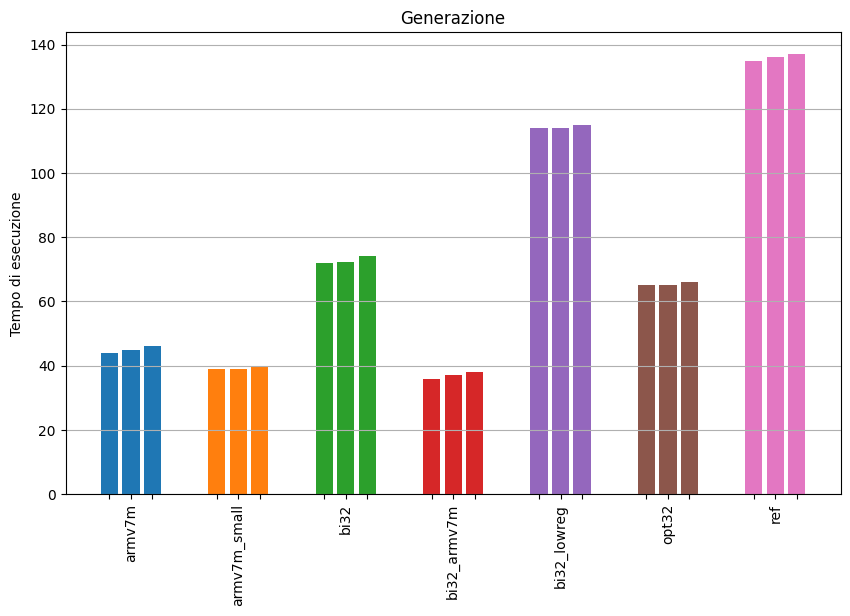

In [6]:
# Generazione tag
plotter(DATAFRAMES, "0B-A", IMPLEMENTATIONS, 20)

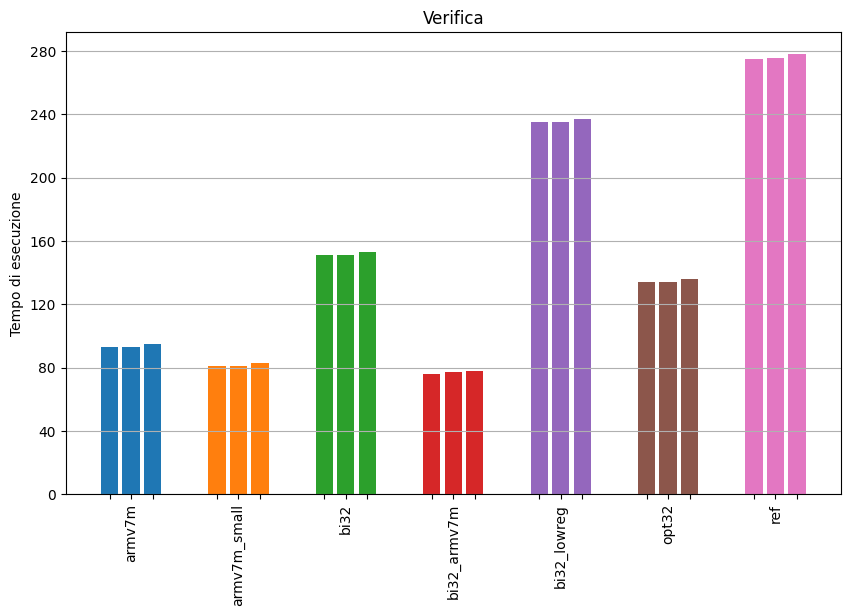

In [7]:
# Verifica tag
plotter(DATAFRAMES, "0B-V", IMPLEMENTATIONS, 40)

### PT 8 byte

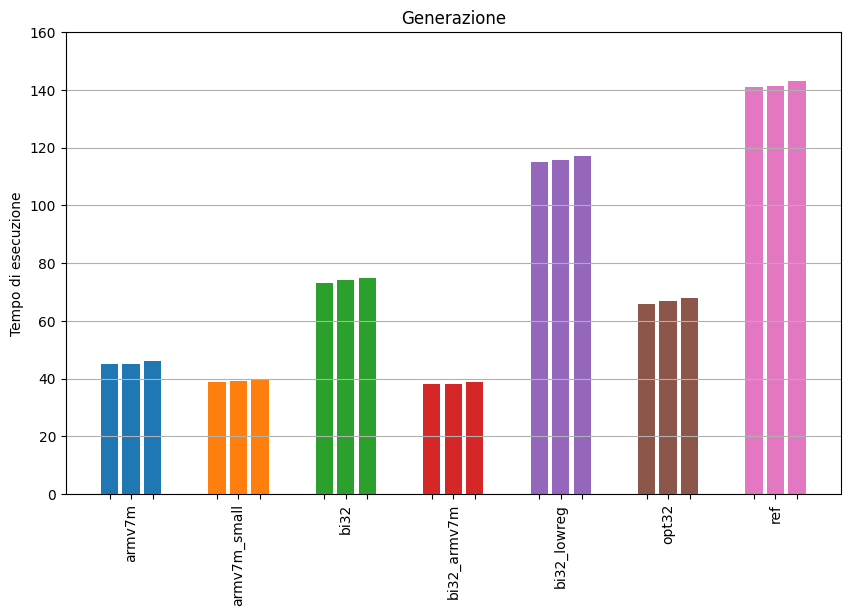

In [8]:
# Generazione tag
plotter(DATAFRAMES, "8B-A", IMPLEMENTATIONS, 20)

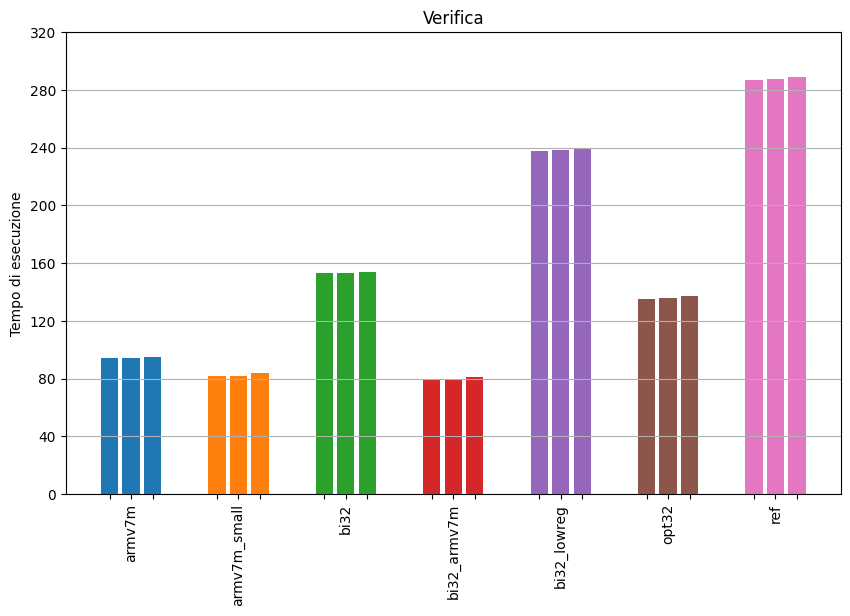

In [9]:
# Verifica tag
plotter(DATAFRAMES, "8B-V", IMPLEMENTATIONS, 40)

### PT 16 byte

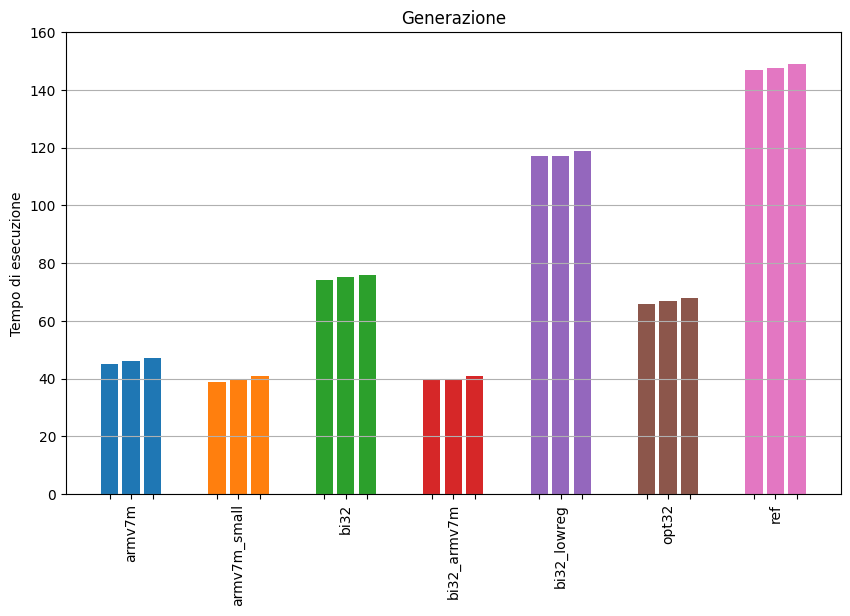

In [10]:
# Generazione tag
plotter(DATAFRAMES, "16B-A", IMPLEMENTATIONS, 20)

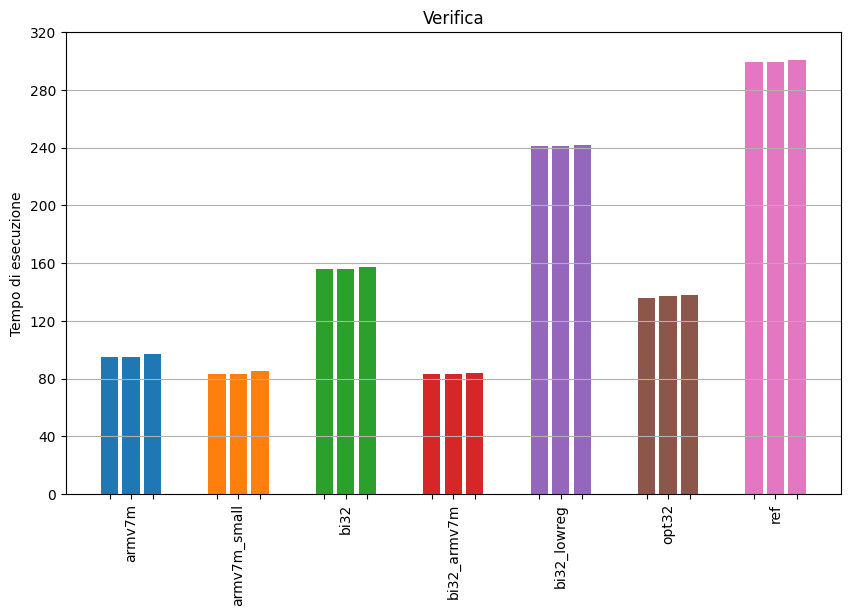

In [11]:
# Verifica tag
plotter(DATAFRAMES, "16B-V", IMPLEMENTATIONS, 40)

### PT 32 byte

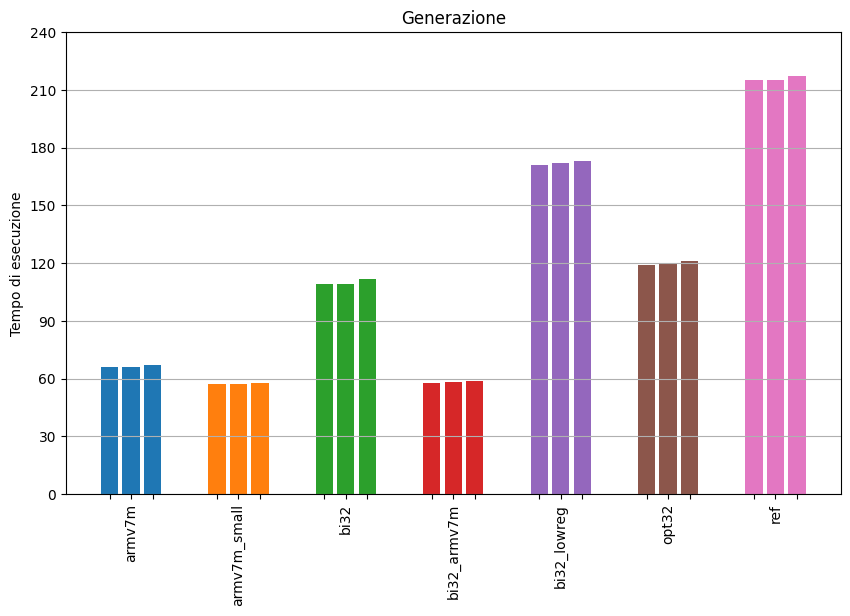

In [12]:
# Generazione tag
plotter(DATAFRAMES, "32B-A", IMPLEMENTATIONS, 30)

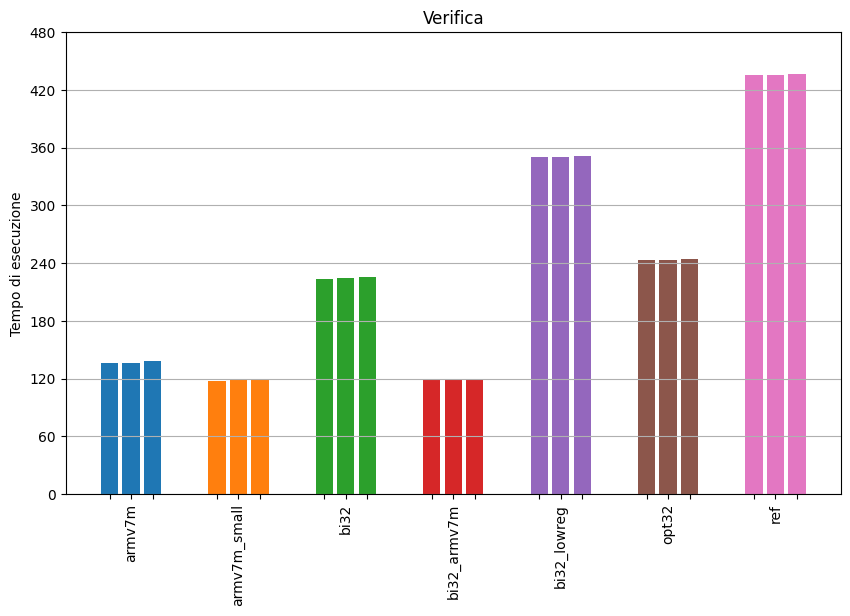

In [13]:
# Verifica tag
plotter(DATAFRAMES, "32B-V", IMPLEMENTATIONS, 60)

#### PT 64 byte

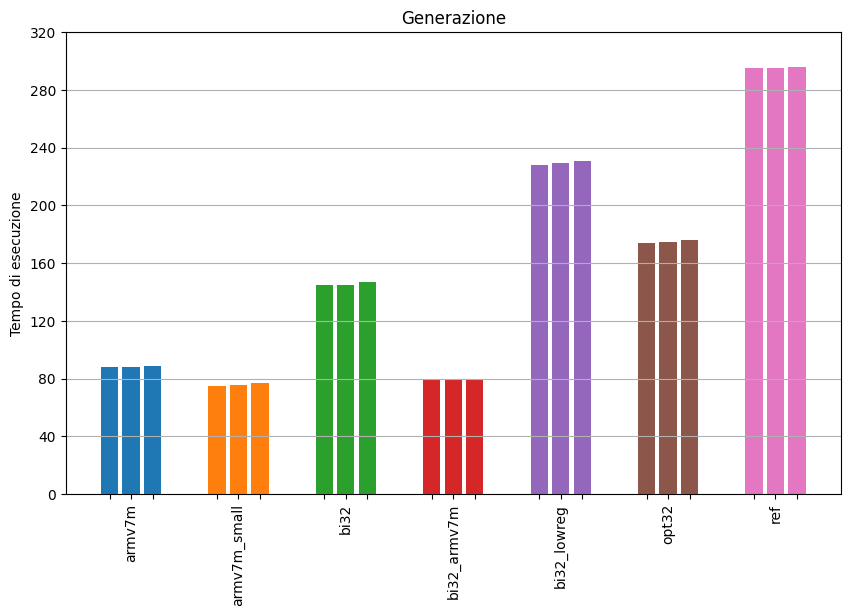

In [14]:
# Generazione tag
plotter(DATAFRAMES, "64B-A", IMPLEMENTATIONS, 40)

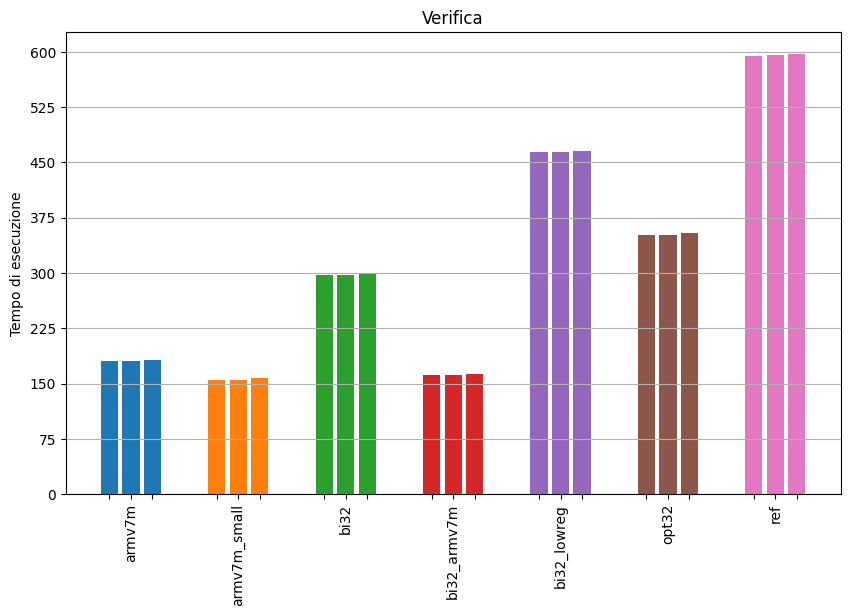

In [15]:
# Verifica tag
plotter(DATAFRAMES, "64B-V", IMPLEMENTATIONS, 75)

#### PT 128 byte

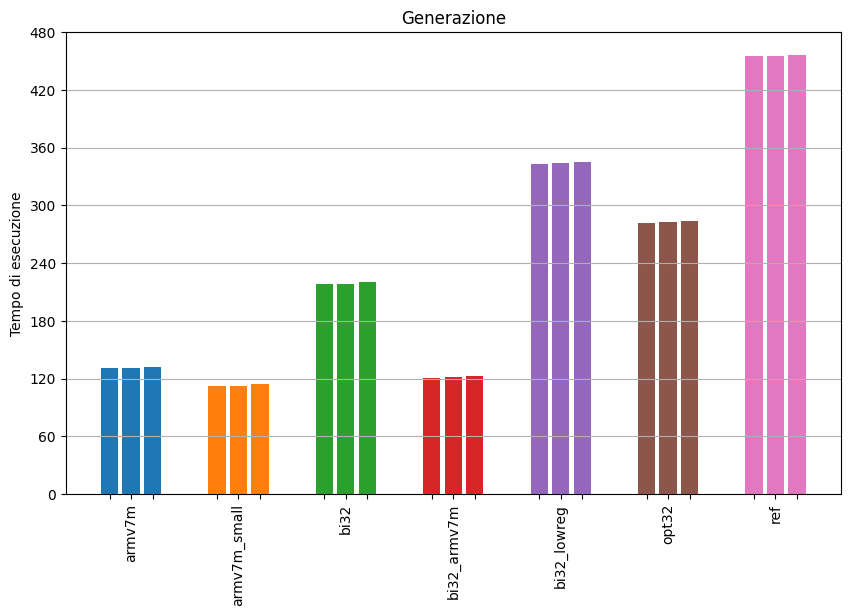

In [16]:
# Generazione tag
plotter(DATAFRAMES, "128B-A", IMPLEMENTATIONS, 60)

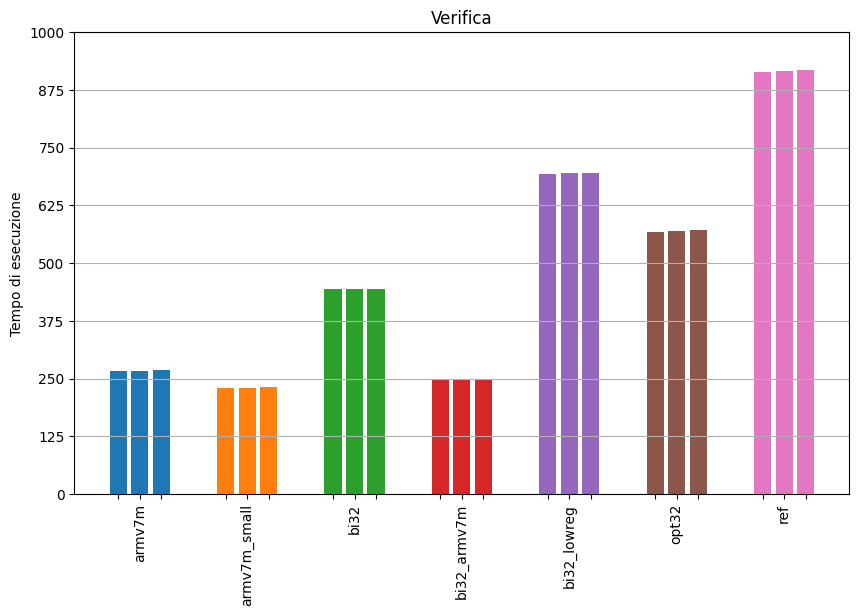

In [17]:
# Verifica tag
plotter(DATAFRAMES, "128B-V", IMPLEMENTATIONS, 125)

#### PT 256 byte

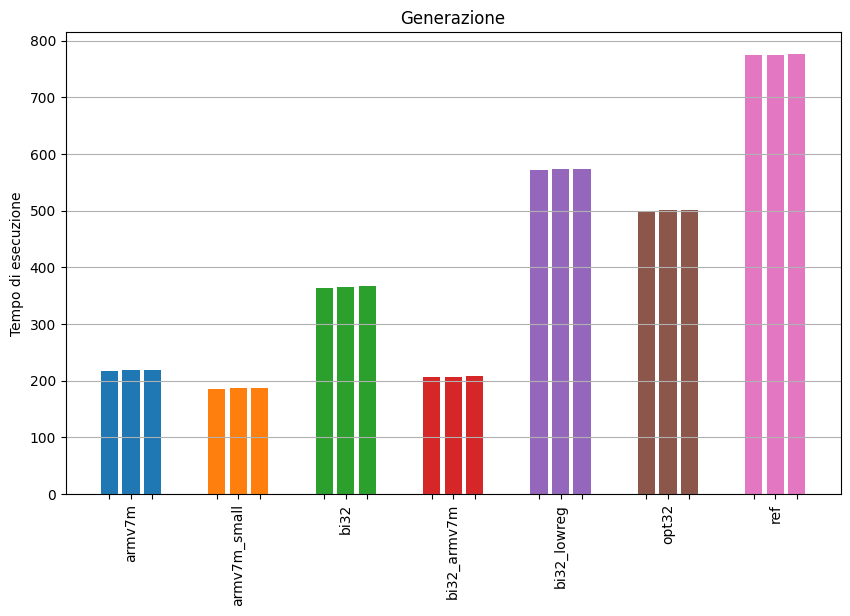

In [18]:
# Generazione tag
plotter(DATAFRAMES, "256B-A", IMPLEMENTATIONS, 100)

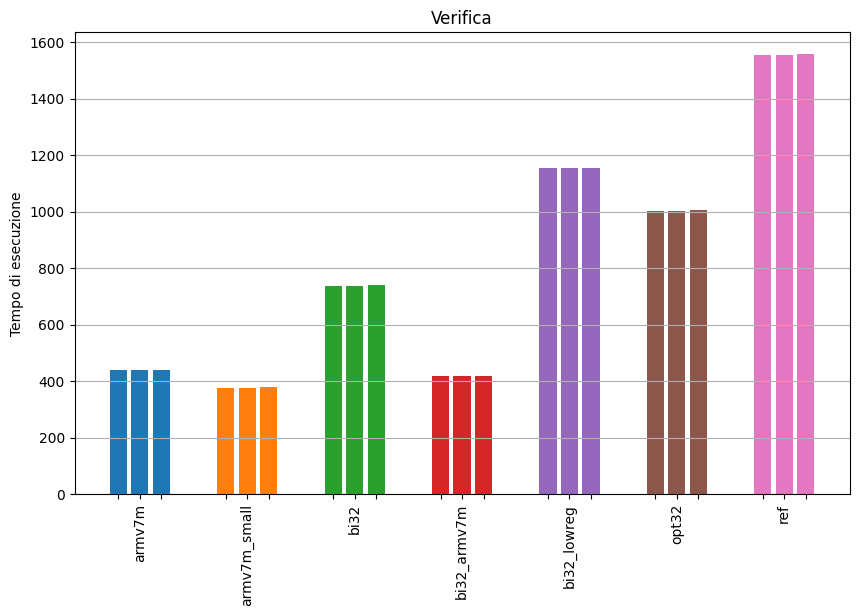

In [19]:
# Verifica tag
plotter(DATAFRAMES, "256B-V", IMPLEMENTATIONS, 200)

#### PT 512 byte

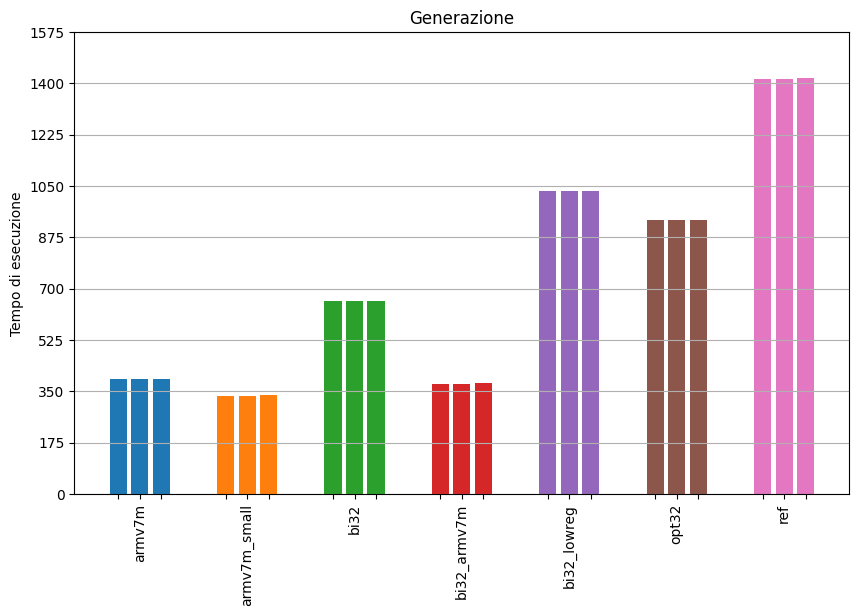

In [20]:
# Generazione tag
plotter(DATAFRAMES, "512B-A", IMPLEMENTATIONS, 175)

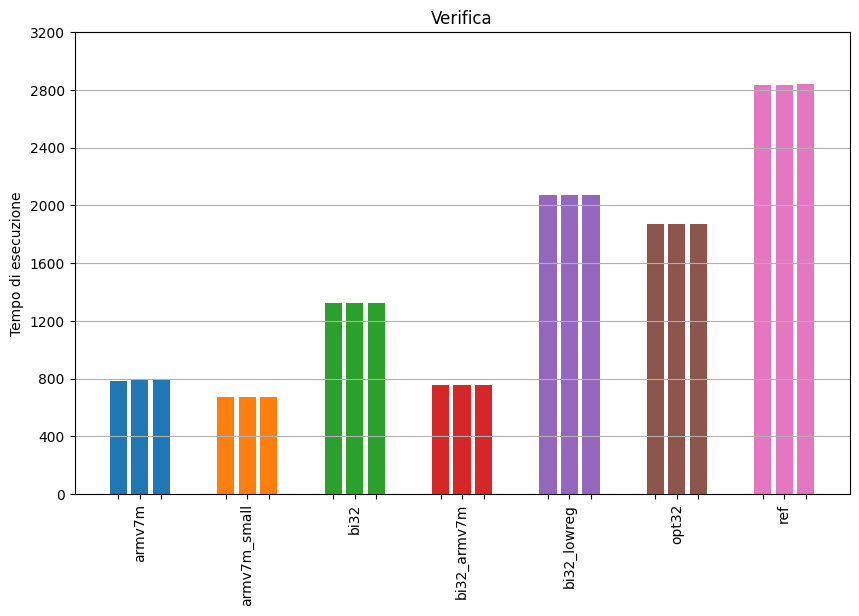

In [21]:
# Verifica tag
plotter(DATAFRAMES, "512B-V", IMPLEMENTATIONS, 400)

#### PT 1024 byte

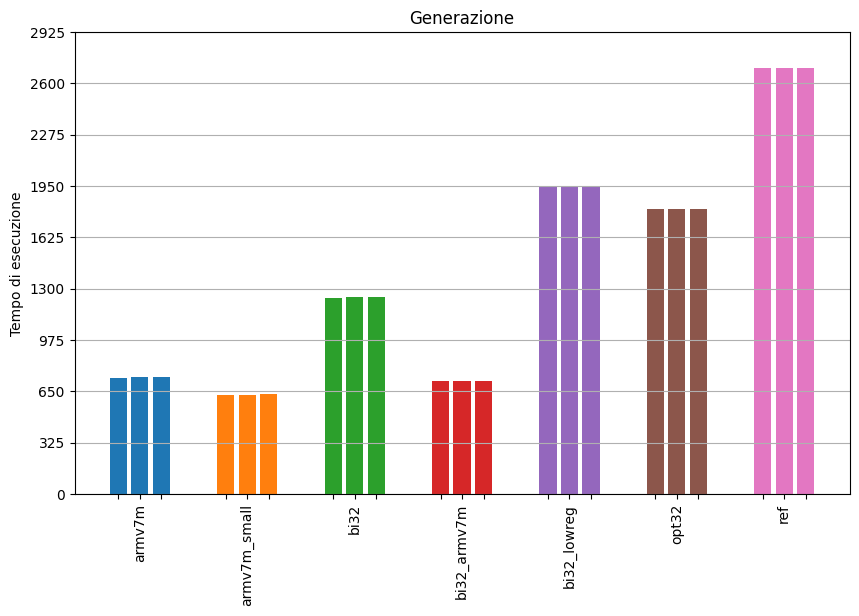

In [22]:
# Generazione tag
plotter(DATAFRAMES, "1024B-A", IMPLEMENTATIONS, 325)

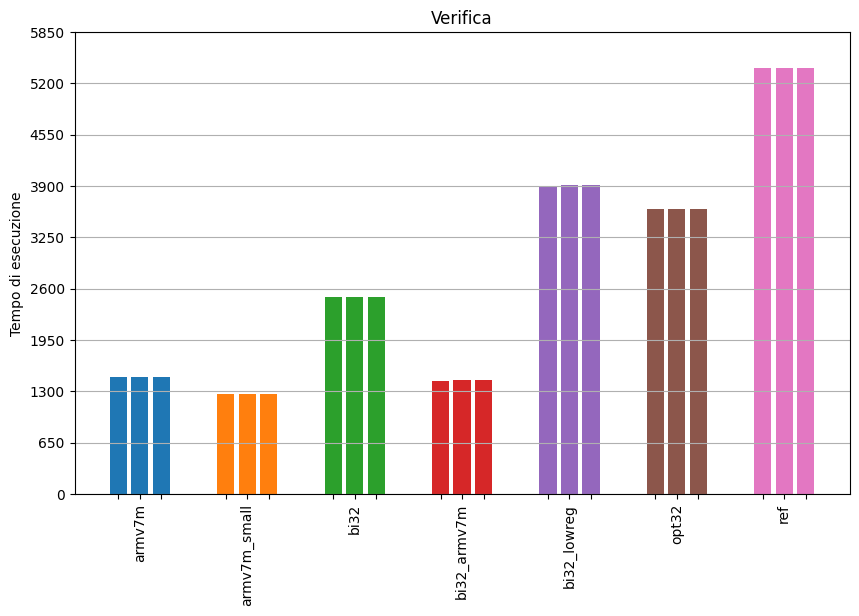

In [23]:
# Verifica tag
plotter(DATAFRAMES, "1024B-V", IMPLEMENTATIONS, 650)

## Conclusioni

### Setup

In [24]:
def checker(dataframes: list, columns: list, index: int, check: FunctionType) -> None:
    for column in columns:
        test_series = dataframes[index][column]
        for i in range(len(dataframes)):
            if i == index:
                continue
            series = dataframes[i][column]
            assert check(test_series.min(), series.min())
            assert check(test_series.mean(), series.mean())
            assert check(test_series.max(), series.max())

    print("Nessuna AssertionError è stata sollevata")

In [25]:
def template(best: pd.DataFrame, worst: pd.DataFrame, columns: list, calculate: FunctionType) -> None:
    results = [[], [], []]
    for column in columns:
        best_series = best[column]
        worst_series = worst[column]
        results[0].append(calculate(best_series.min(), worst_series.min()))
        results[1].append(calculate(best_series.mean(), worst_series.mean()))
        results[2].append(calculate(best_series.max(), worst_series.max()))
    
    results = [
        [min(results[0]), max(results[0])],
        [min(results[1]), max(results[1])],
        [min(results[2]), max(results[2])]
    ]

    print(f"Rispetto alla misurazione minima: da {results[0][0]} a {results[0][1]}")
    print(f"Rispetto alla misurazione media: da {results[1][0]} a {results[1][1]}")
    print(f"Rispetto alla misurazione massima: da {results[2][0]} a {results[2][1]}")

In [26]:
def times(best: pd.DataFrame, worst: pd.DataFrame, columns: list) -> None:
    def calculate(best: int, worst: int) -> float:
        return np.around( worst/best, 2 )
    template(best, worst, columns, calculate)
    
    
def percentage_increase(best: pd.DataFrame, worst: pd.DataFrame, columns: list) -> None:
    def calculate(best: int, worst: int) -> float:
        return np.around( ((worst * 100) / best) - 100, 2 )
    template(best, worst, columns, calculate)

### Migliori implementazioni

Considerando PT di grandezza $0$  e $8$ byte, l'implementazione migliore è la `bi32_armv7m`

Quasi a pari merito troviamo poi le implementazioni `armv7m_small` e `armv7m`, che, come quella migliore, sono ottimizzate per architetture ARMv7-M

Considerando PT di grandezza $16$ e $32$ byte, nessuna delle prime due implementazioni domina l'altra

Le prime due posizioni in classifica si invertono considerando invece PT di grandezza $64$, $128$, $256$, $512$ e $1024$ byte

In [30]:
# Bi32_armv7m migliore implementazione per PT da 0 e 8 byte
checker(DATAFRAMES, INDEX[:4], 3, lambda x,y : x < y)

Nessuna AssertionError è stata sollevata


In [34]:
# Bi32_armv7m e armv7m_small non si dominano per PT da 16 e 32 byte
try:
    checker(DATAFRAMES, INDEX[4:8], 3, lambda x,y : x < y)
except AssertionError:
    print("Implementazione bi32_armv7m non domina armv7m_small")

try:
    checker(DATAFRAMES, INDEX[4:8], 1, lambda x,y : x < y)
except AssertionError:
    print("Implementazione armv7m_small non domina bi32_armv7m")

Implementazione bi32_armv7m non domina armv7m_small
Implementazione armv7m_small non domina bi32_armv7m


In [35]:
# Armv7m_small migliore implementazione per i restanti PT
checker(DATAFRAMES, INDEX[8:], 1, lambda x,y : x < y)

Nessuna AssertionError è stata sollevata


### Peggiori implementazioni

L'implementazione `ref` è quella che ha ottenuto i tempi di esecuzione peggiori in ogni possibile grandezza di PT considerata

A seguire abbiamo le implementazioni `bi32_lowreg`, `opt32` e `bi32`, ma con tempi di esecuzione nettamente migliori: infatti, l'implementazione `ref` è almeno il $17$\% più lenta rispetto alla prima citata, arrivando fino al $38$\%, e circa $3.35/4.3$ volte più lenta dell'implementazione migliore

Notiamo subito come le implementazioni peggiori sono quelle che cercano di ottimizzare architetture $32$ bit generiche oppure quella priva di ottimizzazioni

In [36]:
# Ref peggiore implementazione
checker(DATAFRAMES, INDEX, 6, lambda x,y : x > y)

Nessuna AssertionError è stata sollevata


In [37]:
# Ref quante volte è peggio di armv7m_small, migliore per quasi ogni PT
times(armv7m_small, ref, INDEX)

Rispetto alla misurazione minima: da 3.4 a 4.28
Rispetto alla misurazione media: da 3.39 a 4.27
Rispetto alla misurazione massima: da 3.35 a 4.27


In [38]:
# Ref quanti punti percentuali è peggio di bi32_lowreg, seconda peggiore
percentage_increase(bi32_lowreg, ref, INDEX)

Rispetto alla misurazione minima: da 17.02 a 38.13
Rispetto alla misurazione media: da 17.06 a 38.06
Rispetto alla misurazione massima: da 17.3 a 38.1


### Dimensioni eseguibile

Le implementazioni `armv7m_small`, `ref` e `bi32_lowreg` sono quelle sono quelle che hanno una dimensione dell'eseguibile molto piccola, occupando circa il $2/3$\% dello spazio disponibile, ma di queste tre solo la prima può vantare anche degli ottimi tempi di esecuzione

L'implementazione peggiore dal punto di vista dello spazio è invece la `opt32`, che occupa circa il $7/8$\% dello spazio disponibile

Considerando l'altra implementazione migliore, quindi la `bi32_armv7m`, essa occupa circa il $4/5$\% dello spazio disponibile, dimostrandosi un'ottima soluzione anche per quanto riguarda lo spazio occupato